## Black Friday Purchase Prediction

The dataset used in this analysis contains information of transactions in a store on Black Friday, including customers' demographical features and transaction details. The dataset comes from a competition hosted by Analytics Vidhya.

In this analysis I will do two things. Firstly I will explore the data and find some correlations between differents elements, so I can get some insights for future marketing strategies. On top of that I will also use regression method to predict future purchase.

In [1]:
# Standard imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To visualize the whole grid
pd.options.display.max_columns = 999

In [2]:
blackfriday = pd.read_csv('BlackFridayDataset.csv')
blackfriday.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
blackfriday.shape

(537577, 12)

The dataset is having 12 input variables and 537577 observations.

In [4]:
blackfriday.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
Unique = blackfriday.nunique()
Unique

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

In [6]:
blackfriday.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [7]:
blackfriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [8]:
#Keeping a copy of the original data
blackfriday_original = blackfriday.copy()
blackfriday_original.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Handling Missing Values

In [9]:
# Find Duplicate Rows
duplicate_rows_df = blackfriday[blackfriday.duplicated()]
print("number of duplicate rows:" , duplicate_rows_df.shape)

number of duplicate rows: (0, 12)


Their are no Duplicate rows

In [10]:
blackfriday.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

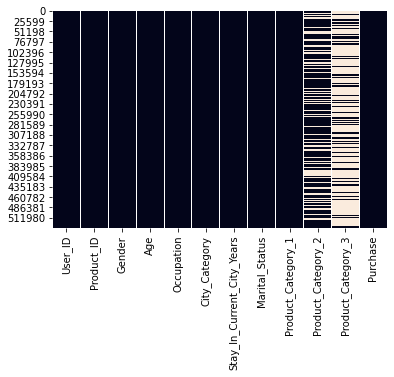

In [11]:
sns.heatmap(blackfriday.isnull(), cbar=False)
plt.show();

In [12]:
cat_2 = blackfriday['Product_Category_2'].value_counts().sum()
cat_3 = blackfriday['Product_Category_3'].value_counts().sum()

In [13]:
(len(blackfriday) - cat_2)/len(blackfriday)*100 , (len(blackfriday) - cat_3)/len(blackfriday)*100

(31.06271287648095, 69.44102891306734)

**Dropping Productcategory3 as they have missing values more than 50% and imputing Product Category 2 with mode.**

In [14]:
blackfriday.drop(columns=['Product_Category_3'], axis=1 ,inplace = True)

In [15]:
blackfriday.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Purchase                           0
dtype: int64

In [16]:
blackfriday.shape

(537577, 11)

In [17]:
blackfriday['Product_Category_2'].fillna(blackfriday['Product_Category_2'].mode()[0],inplace = True)

In [18]:
blackfriday.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

# 1. Exploratory Data Analysis (EDA)


In [19]:
#Filter categorical variables and get dataframe will all strings columns names except Item_identfier and outlet_identifier
category_cols = blackfriday.select_dtypes(include=['object'])
#Print frequency of categories
for col in category_cols:
   #Number of times each value appears in the column
   frequency = blackfriday[col].value_counts()
   print("\nThis is the frequency distribution for " + col + ":")
   print(frequency)


This is the frequency distribution for Product_ID:
P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
             ... 
P00053242       1
P00051742       1
P00341542       1
P00072042       1
P00234942       1
Name: Product_ID, Length: 3623, dtype: int64

This is the frequency distribution for Gender:
M    405380
F    132197
Name: Gender, dtype: int64

This is the frequency distribution for Age:
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

This is the frequency distribution for City_Category:
B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

This is the frequency distribution for Stay_In_Current_City_Years:
1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64


<h3>1.1. Univariate Distribution</h3>
<h4>1.1.1.  Distribution of the target variable</h4>

Text(0.5, 1.0, 'Purchase amount Distribution')

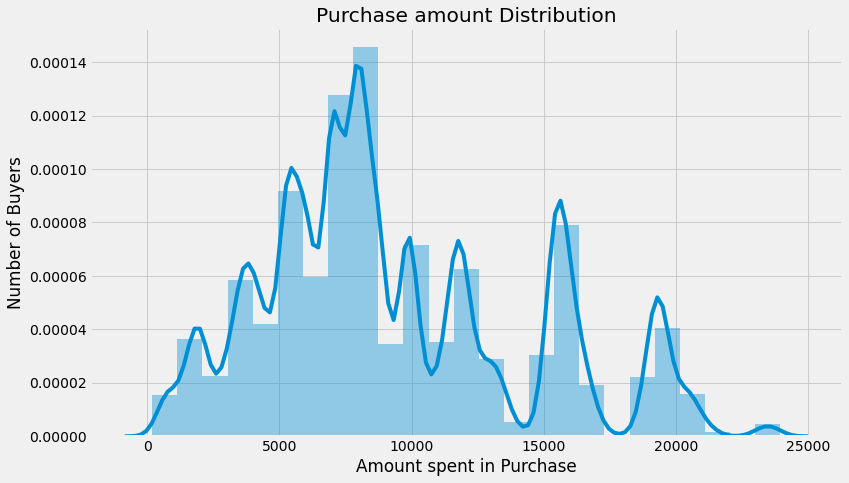

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(blackfriday.Purchase,bins = 25)
plt.xlabel("Amount spent in Purchase"),
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

It seems like our target variable has an almost Gaussian distribution.

In [21]:
print ("Skew is:", blackfriday.Purchase.skew())
print("Kurtosis: %f" % blackfriday.Purchase.kurt())

Skew is: 0.6242797316083074
Kurtosis: -0.343121


**1.1.2. Numerical Variables**

In [22]:
numeric_features = blackfriday.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Purchase                int64
dtype: object

<h5>1.1.2.1. Distribution of the Occupation variable</h5>

In [23]:
blackfriday.Occupation.value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

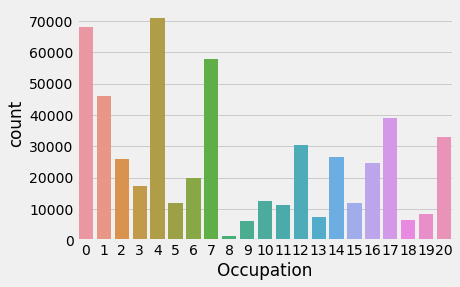

In [24]:
sns.countplot(blackfriday.Occupation);

<h5>1.1.2.2. Distribution of the Marital_Status variable</h5>


In [25]:
blackfriday.Marital_Status.value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

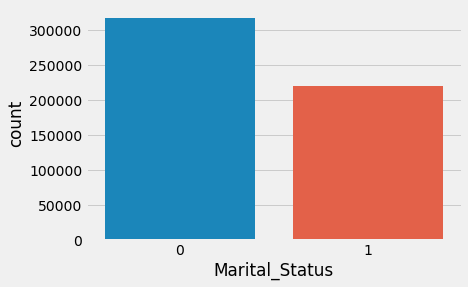

In [26]:
sns.countplot(blackfriday.Marital_Status);

<h5>1.1.2.3. Distribution of the Product_Category_1 variable</h5>

In [27]:
blackfriday.Product_Category_1.value_counts()

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

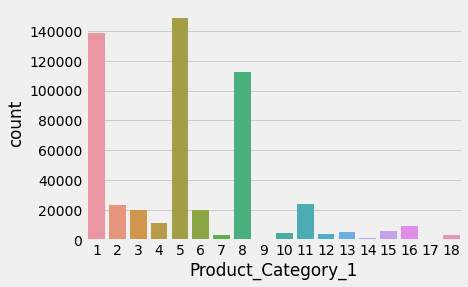

In [28]:
sns.countplot(blackfriday.Product_Category_1);

<h5>1.1.2.4. Distribution of the Product_Category_2 variable</h5>

In [29]:
blackfriday.Product_Category_2.value_counts()

8.0     230044
14.0     54158
2.0      48481
16.0     42602
15.0     37317
5.0      25874
4.0      25225
6.0      16251
11.0     13945
17.0     13130
13.0     10369
9.0       5591
12.0      5419
10.0      2991
3.0       2835
18.0      2730
7.0        615
Name: Product_Category_2, dtype: int64

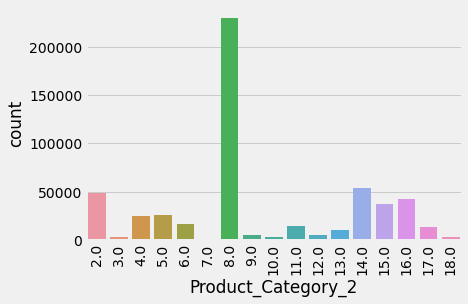

In [30]:
sns.countplot(blackfriday.Product_Category_2)
plt.xticks(rotation=90);

<h5>1.1.2.6. Correlation between Numerical Predictors and Target variable</h5>

In [31]:
corr = numeric_features.corr()

print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')

Purchase              1.000000
Occupation            0.021104
User_ID               0.005389
Marital_Status        0.000129
Product_Category_2   -0.134300
Product_Category_1   -0.314125
Name: Purchase, dtype: float64 



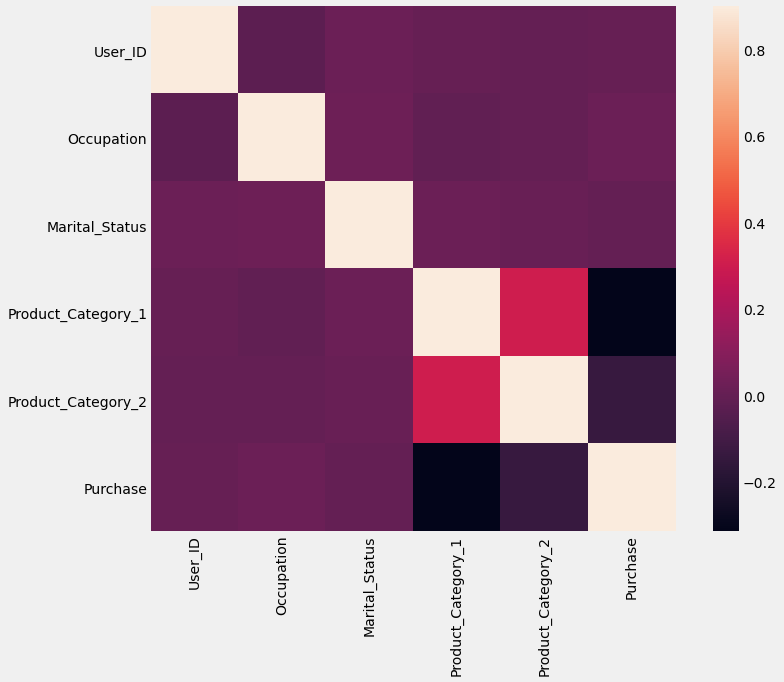

In [32]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.9, square=True);

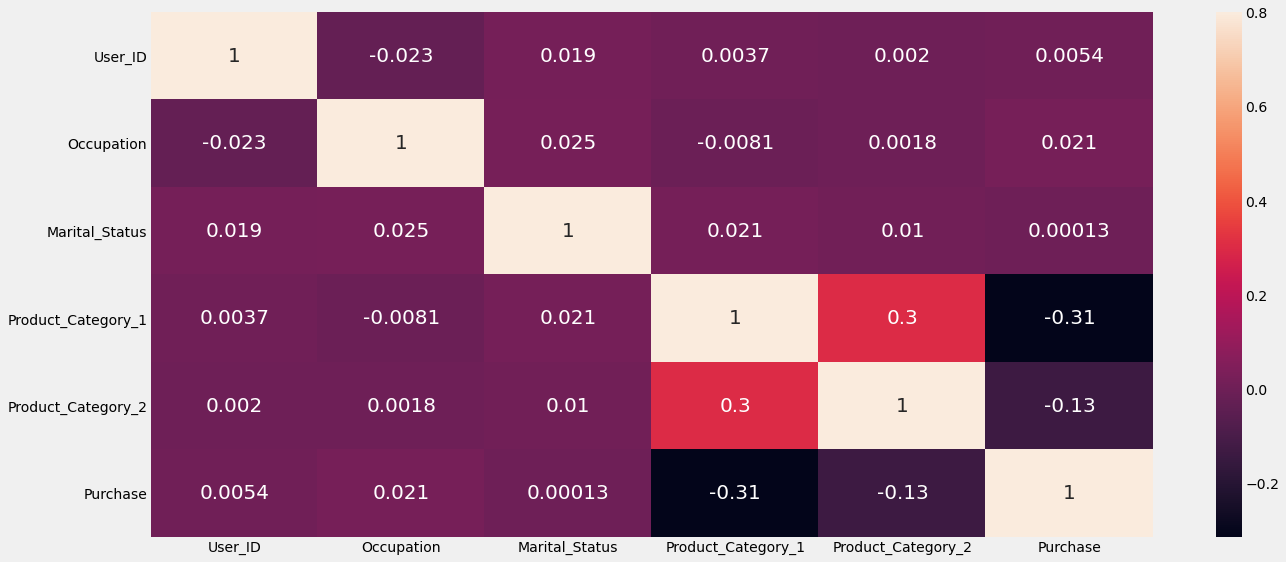

In [33]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True);

<h4>1.1.3. Categorical Variables</h4>
<h5>1.1.3.1. Distribution of the variable Gender</h5>

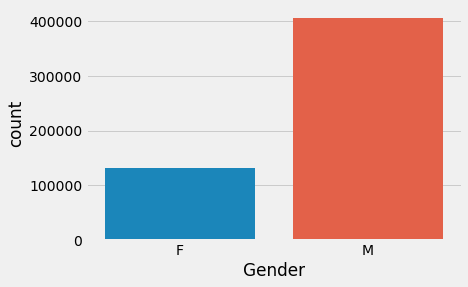

In [34]:
sns.countplot(blackfriday.Gender);

<h5>1.1.3.2. Distribution of the variable Age</h5>

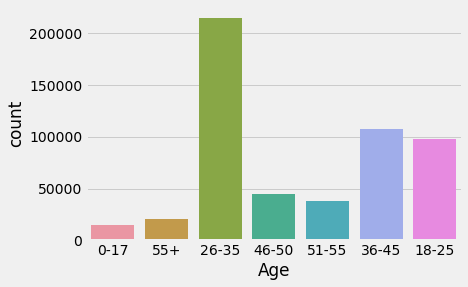

In [35]:
sns.countplot(blackfriday.Age);

<h5>1.1.3.3. Distribution of the variable City_Category</h5>

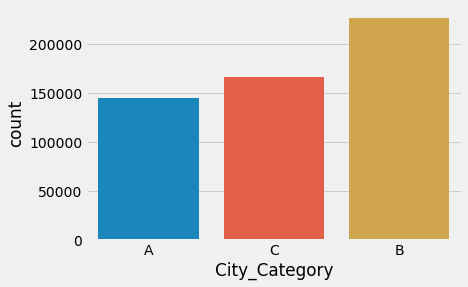

In [36]:
sns.countplot(blackfriday.City_Category);

<h5>1.1.3.4. Distribution of the variable Stay_In_Current_City_Years</h5>

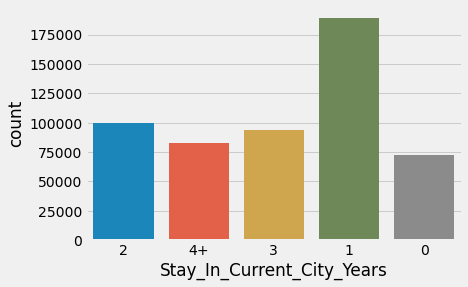

In [37]:
sns.countplot(blackfriday.Stay_In_Current_City_Years);

<h3>1.2. Bivariate Distribution</h3>
<h4>1.2.1. Numerical Variables</h4>
<h5>1.2.1.1. Occupation and Purchase Analysis</h5>

Text(0.5, 1.0, 'Occupation and Purchase')

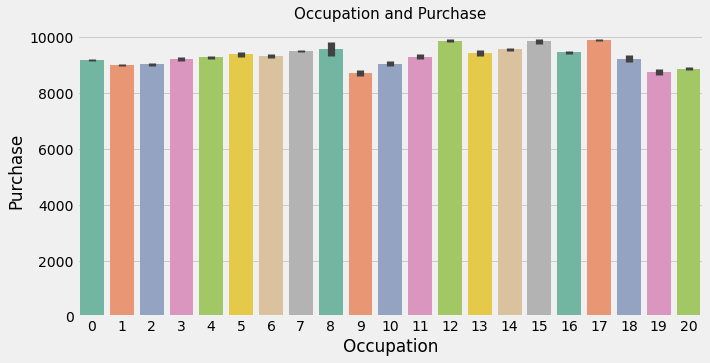

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x="Occupation", y="Purchase", data=blackfriday, palette='Set2')
plt.title('Occupation and Purchase', fontsize=15)


<h5>1.2.1.2. Marital_Status and Purchase Analysis</h5>

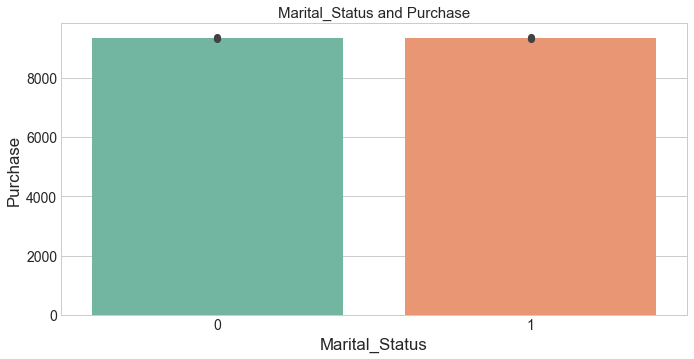

In [39]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x="Marital_Status", y="Purchase", data=blackfriday, palette='Set2')
plt.title('Marital_Status and Purchase', fontsize=15);

<h5>1.2.1.3. Product_Category_1 and Purchase Analysis</h5>

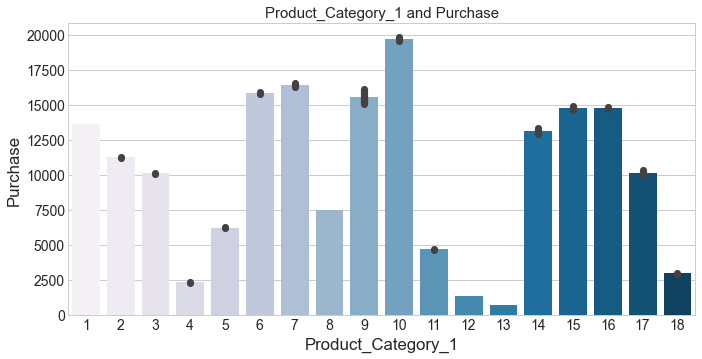

In [40]:
# Product_category_1_pivot = \
# blackfriday.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)

# Product_category_1_pivot.plot(kind='bar', color='darkblue',figsize=(12,7))
# plt.xlabel("Product_Category_1")
# plt.ylabel("Purchase")
# plt.title("Product_Category_1 and Purchase Analysis")
# plt.xticks(rotation=0)
# plt.show()


plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x="Product_Category_1", y="Purchase", data=blackfriday, palette='PuBu')
plt.title('Product_Category_1 and Purchase', fontsize=15);



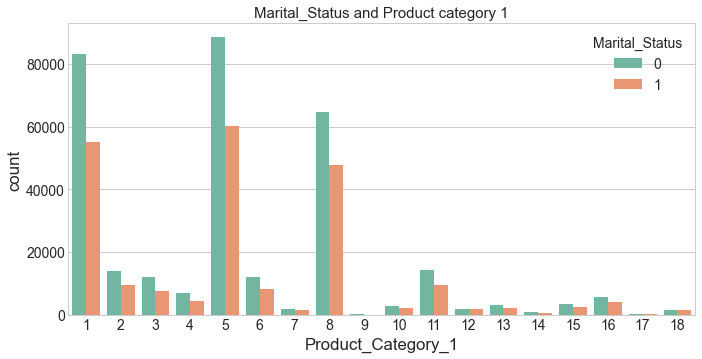

In [41]:
plt.figure(figsize=(10,5))
plot1 = sns.countplot(x="Product_Category_1", hue ='Marital_Status', data=blackfriday, palette='Set2')
plt.title('Marital_Status and Product category 1', fontsize=15);


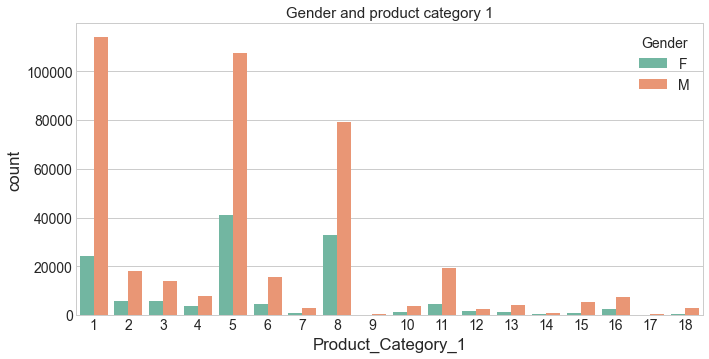

In [42]:
plt.figure(figsize=(10,5))
plot = sns.countplot(x="Product_Category_1", hue ='Gender', data=blackfriday, palette='Set2')
plt.title('Gender and product category 1', fontsize=15);


<h5>1.2.1.4. Product_Category_2 and Purchase Analysis</h5>

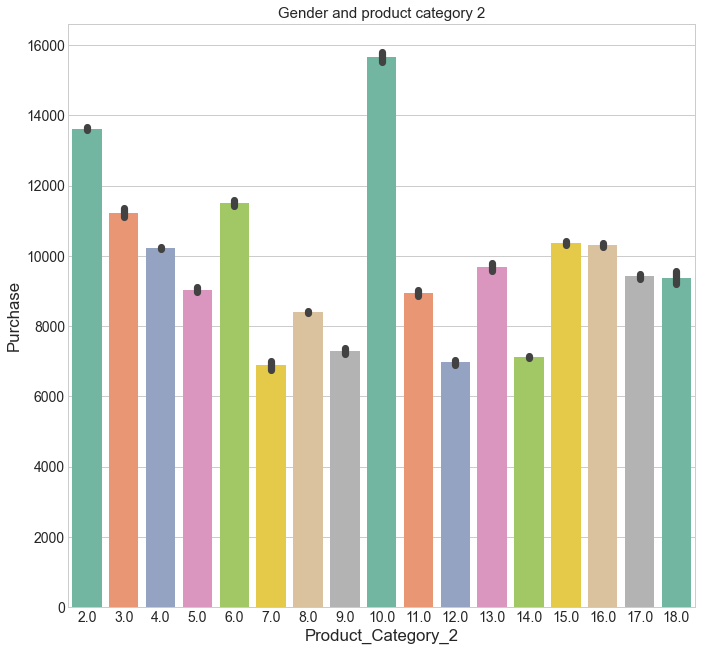

In [43]:
plt.figure(figsize=(10,10))
sns.barplot(x="Product_Category_2", y ='Purchase', data=blackfriday, palette='Set2')
plt.title('Gender and product category 2', fontsize=15);


<h4>1.2.2. Categorical Variables</h4>
<h5>1.2.2.1. Gender and Purchase Analysis</h5>

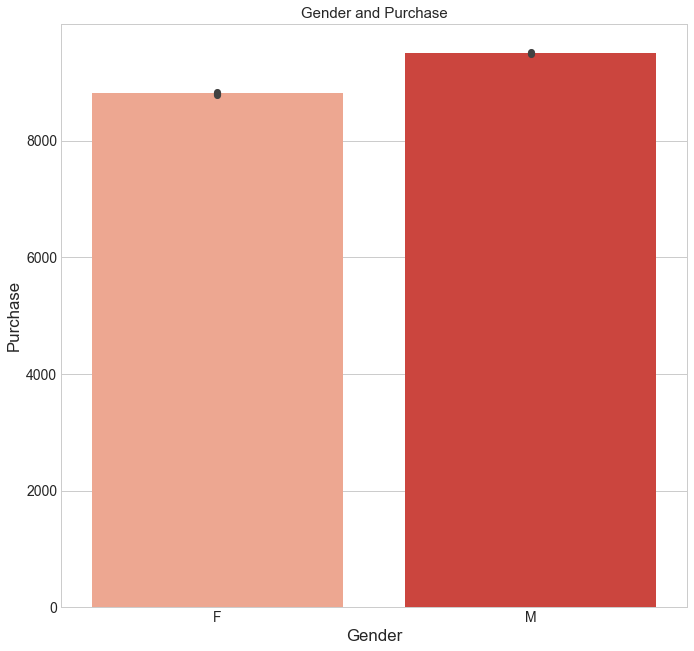

In [44]:
plt.figure(figsize=(10,10))
sns.barplot(x="Gender", y ='Purchase', data=blackfriday, palette='Reds')
plt.title('Gender and Purchase', fontsize=15);


<h5>1.2.2.2. Age and Purchase Analysis</h5>

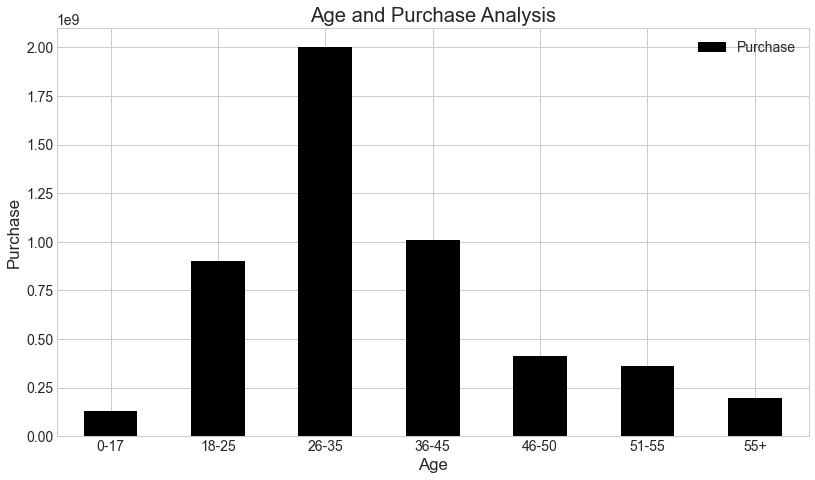

In [45]:
Product_category_1_pivot = \
blackfriday.pivot_table(index='Age', values="Purchase", aggfunc=np.sum)

Product_category_1_pivot.plot(kind='bar', color='black',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

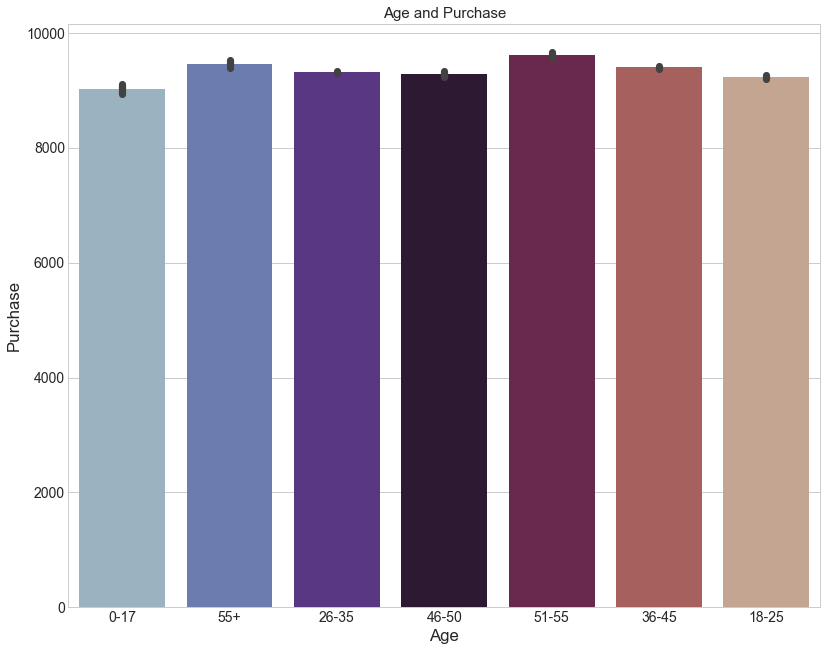

In [46]:
plt.figure(figsize=(12,10))
sns.barplot(x="Age", y ='Purchase', data=blackfriday, palette='twilight')
plt.title('Age and Purchase', fontsize=15);


<h5>1.2.2.3. City_Category and Purchase Analysis</h5>

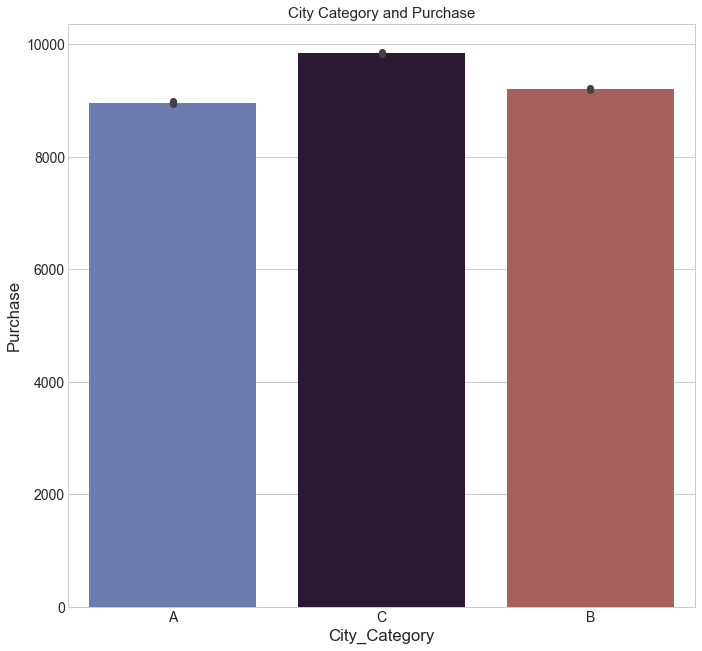

In [47]:
plt.figure(figsize=(10,10))
sns.barplot(x="City_Category", y ='Purchase', data=blackfriday, palette='twilight')
plt.title('City Category and Purchase', fontsize=15);


<h5>1.2.2.4. Stay_in_Current_City_Years and Purchase Analysis</h5>

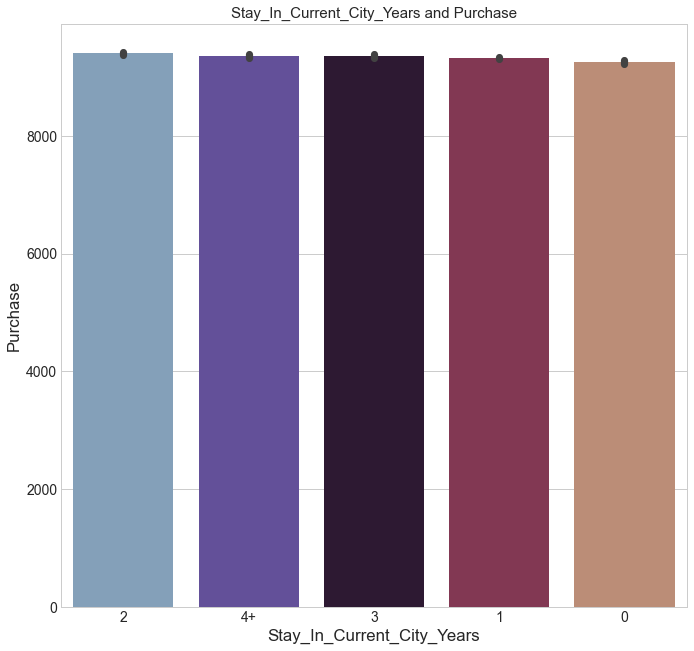

In [48]:
# Product_category_1_pivot = \
# blackfriday.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)

# Product_category_1_pivot.plot(kind='bar', color='Gold',figsize=(12,7))
# plt.xlabel("Stay_in_Current_City_Years")
# plt.ylabel("Purchase")
# plt.title("Stay_in_Current_City_Years and Purchase Analysis")
# plt.xticks(rotation=0)
# plt.show();

plt.figure(figsize=(10,10))
sns.barplot(x="Stay_In_Current_City_Years", y ='Purchase', data=blackfriday, palette='twilight')
plt.title('Stay_In_Current_City_Years and Purchase', fontsize=15);


<h5>1.2.2.5. Purchase and City Category </h5>

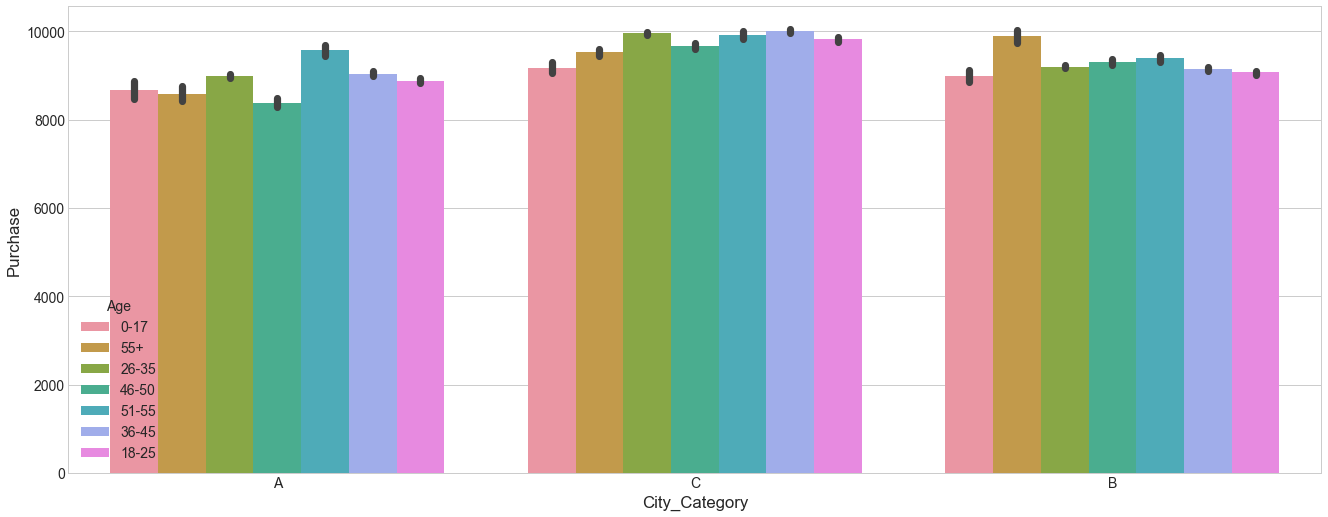

In [49]:
plt.figure(figsize = (20,8))
sns.barplot(x='City_Category', y='Purchase',hue = 'Age',data = blackfriday)

In CITY_A more money spent by 51-55+ age grooup

In CITY_B money spent by all age groups are similar

In CITY_C more money spent by 56+ age group but overall more money sent by city_C.

<h5>1.2.2.6. Most Active User-Id </h5>

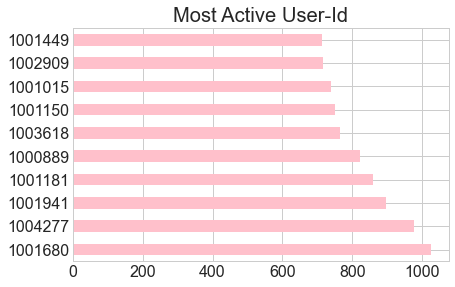

In [50]:
blackfriday.User_ID.value_counts().head(10).plot(kind='barh',title = 'Most Active User-Id', color = 'pink', fontsize = 16);

<h5>1.2.2.7 Top 5 Selled Product_ID</h5>

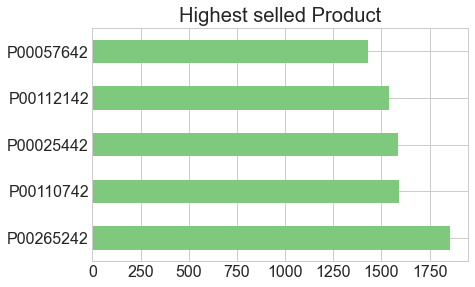

In [51]:
blackfriday.Product_ID.value_counts().head(5).plot(kind='barh',title = 'Highest selled Product', cmap = 'Accent', fontsize = 16);

<h5>1.2.2.8 City Category and Purchase

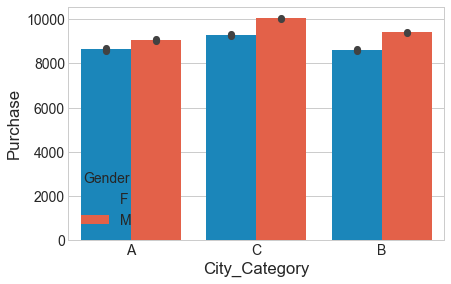

<Figure size 720x720 with 0 Axes>

In [52]:
sns.barplot(x='City_Category',y='Purchase',hue='Gender',data = blackfriday)
plt.figure(figsize = (10,10));

1.Eventhough we have more no of people participated in sale by CITY_B but more money spent by CITY_C people

2.male spent slightly more than female

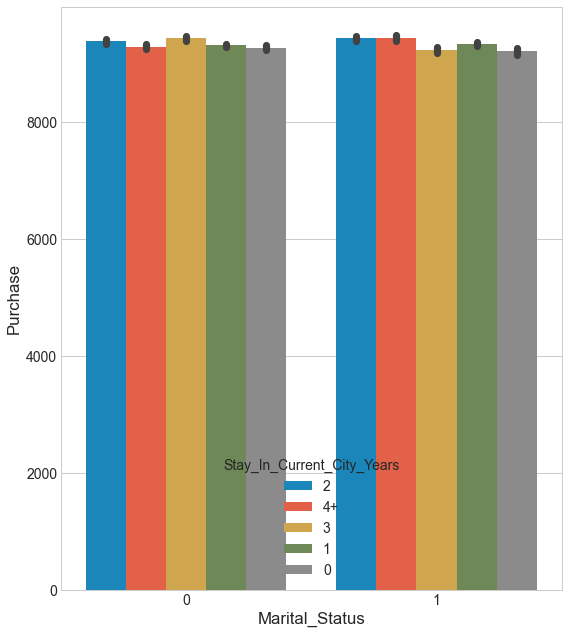

In [53]:
plt.figure(figsize = (8,10));
sns.barplot(x='Marital_Status',y='Purchase',hue='Stay_In_Current_City_Years',data = blackfriday);


## Analysing the Best selled Product_ID

In [54]:
best_seller = blackfriday[blackfriday.Product_ID == 'P00265242']

In [55]:
best_seller

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
399,1000066,P00265242,M,26-35,18,C,2,0,5,8.0,8652
1191,1000196,P00265242,F,36-45,9,C,4+,0,5,8.0,8767
1372,1000222,P00265242,M,26-35,1,A,1,0,5,8.0,6944
1845,1000301,P00265242,M,18-25,4,B,4+,0,5,8.0,8628
2209,1000345,P00265242,M,26-35,12,A,2,1,5,8.0,8593
...,...,...,...,...,...,...,...,...,...,...,...
537292,1004693,P00265242,M,18-25,1,A,1,0,5,8.0,8841
537321,1004702,P00265242,M,26-35,11,C,0,0,5,8.0,6891
537405,1004720,P00265242,M,26-35,2,C,4+,0,5,8.0,8628
537416,1004725,P00265242,M,36-45,5,A,2,0,5,8.0,6916


<h4> 1. Gender</h4>

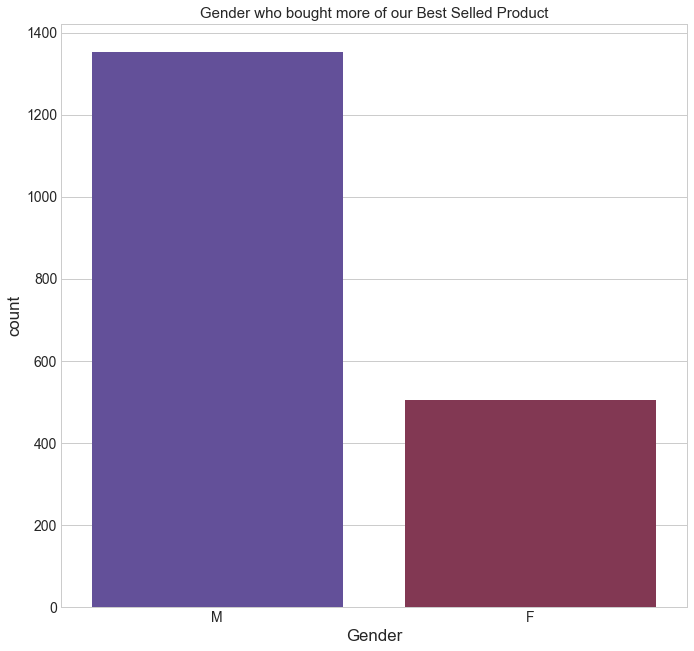

In [56]:
plt.figure(figsize=(10,10))
sns.countplot(x="Gender",data=best_seller, palette='twilight')
plt.title('Gender who bought more of our Best Selled Product', fontsize=15);


<h4> 2. Age</h4>

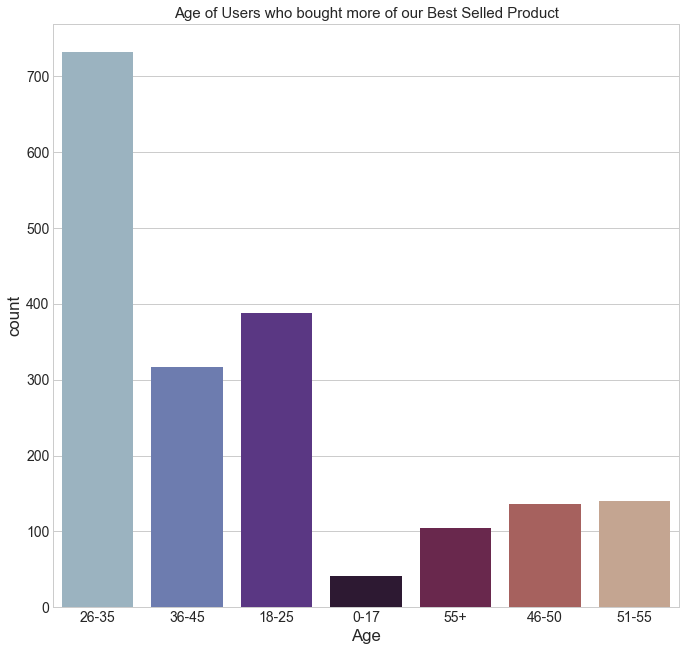

In [57]:
plt.figure(figsize=(10,10))
sns.countplot(x="Age",data=best_seller, palette='twilight')
plt.title('Age of Users who bought more of our Best Selled Product', fontsize=15);


<h4> 3. City_Category</h4>

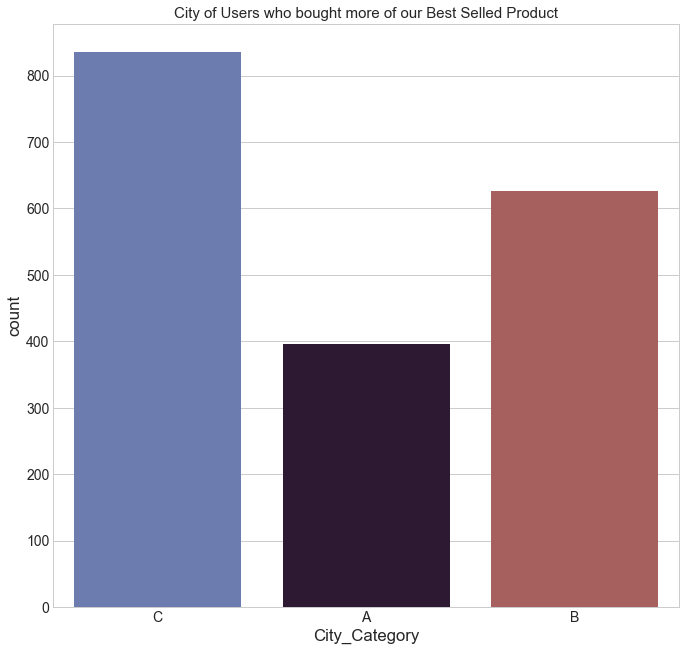

In [58]:
plt.figure(figsize=(10,10))
sns.countplot(x="City_Category",data=best_seller, palette='twilight')
plt.title('City of Users who bought more of our Best Selled Product', fontsize=15);


<h4> 4. Marital_Status</h4>

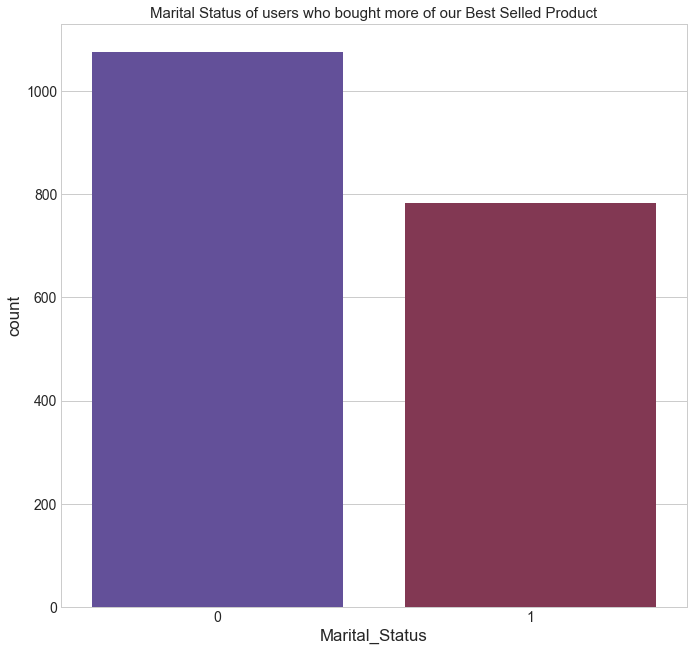

In [59]:
plt.figure(figsize=(10,10))
ax0 = sns.countplot(x="Marital_Status",data=best_seller, palette='twilight')
plt.title('Marital Status of users who bought more of our Best Selled Product', fontsize=15);


<h4> 5. Occupation </h4>

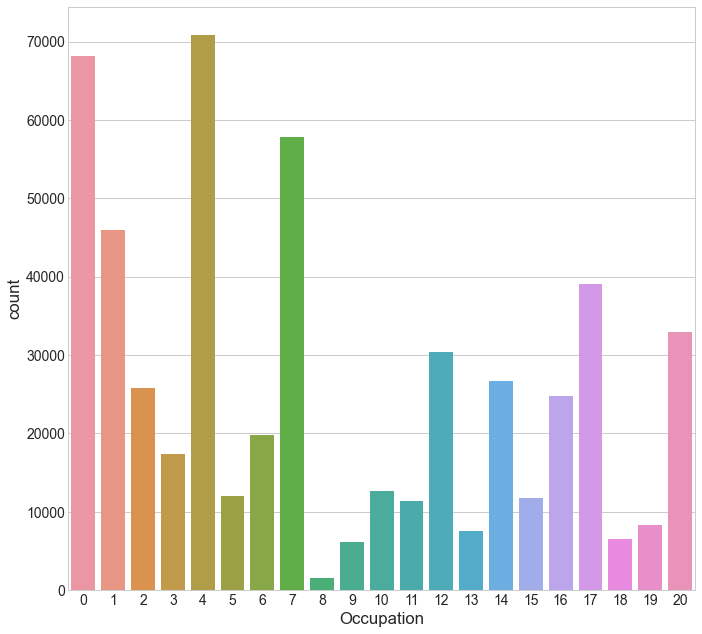

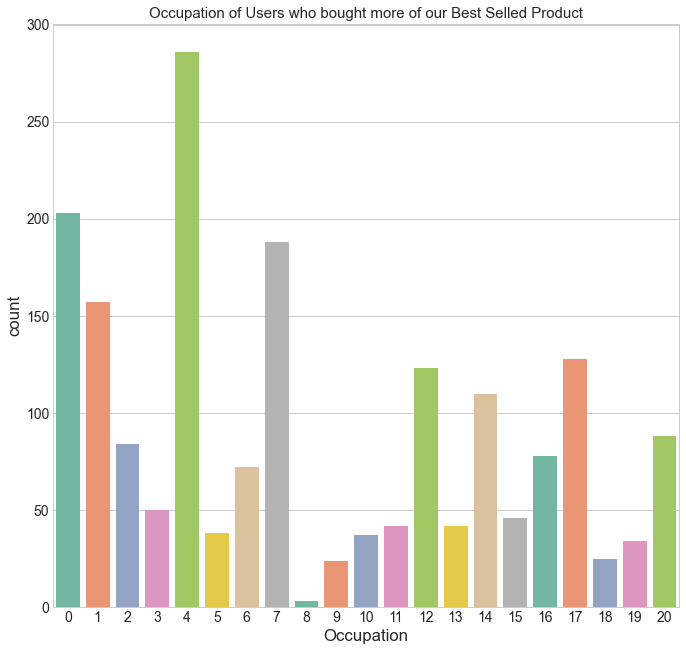

In [60]:
plt.figure(figsize=(10,10))
ax0 = sns.countplot(blackfriday.Occupation);

plt.figure(figsize=(10,10))
ax1 = sns.countplot(x="Occupation",data=best_seller, palette='Set2')
plt.title('Occupation of Users who bought more of our Best Selled Product', fontsize=15);


<h2> 3. Feature Engineering</h2>


<h4> 3.1. Converting gender to binary </h4>


In [61]:
#unique values in Gender parameter
gender = np.unique(blackfriday['Gender'])
gender

def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
    
blackfriday['Gender'] = blackfriday['Gender'].apply(map_gender)

blackfriday["Gender"].value_counts()

1    405380
0    132197
Name: Gender, dtype: int64

In [62]:
blackfriday.Gender.head(5)

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

<h4> 3.2. Converting Age to numeric values </h4>

In [63]:
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
blackfriday["Age"] = blackfriday["Age"].apply(lambda line: age_dict[line])

blackfriday["Age"].value_counts()

2    214690
3    107499
1     97634
4     44526
5     37618
6     20903
0     14707
Name: Age, dtype: int64

<h4> 3.3. Converting city_category to binary </h4>

In [64]:
city_dict = {'A':0, 'B':1, 'C':2}
blackfriday["City_Category"] = blackfriday["City_Category"].apply(lambda line: city_dict[line])

blackfriday["City_Category"].value_counts()

1    226493
2    166446
0    144638
Name: City_Category, dtype: int64

<h4> 3.4. Converting Stay_In_Current_City_Years to binary </h4>


In [65]:
city_stay = np.unique(blackfriday['Stay_In_Current_City_Years'])
city_stay

array(['0', '1', '2', '3', '4+'], dtype=object)

In [66]:
def map_stay(stay):
        if stay == '4+':
            return 4
        else:
            return int(stay)
#             current_years = stay
#             current_years = current_years.astype(int)
#             return current_years
blackfriday['Stay_In_Current_City_Years'] = blackfriday['Stay_In_Current_City_Years'].apply(map_stay)

In [67]:
blackfriday.Stay_In_Current_City_Years.head(5)

0    2
1    2
2    2
3    2
4    4
Name: Stay_In_Current_City_Years, dtype: int64

In [68]:
blackfriday.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,8.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,8.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,8.0,7969
5,1000003,P00193542,1,2,15,0,3,0,1,2.0,15227
6,1000004,P00184942,1,4,7,1,2,1,1,8.0,19215
7,1000004,P00346142,1,4,7,1,2,1,1,15.0,15854
8,1000004,P0097242,1,4,7,1,2,1,1,16.0,15686
9,1000005,P00274942,1,2,20,0,1,1,8,8.0,7871


In [69]:
bf_final = blackfriday.drop(["User_ID","Product_ID"], axis=1)

In [70]:
bf_final.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,8.0,8370
1,0,0,10,0,2,0,1,6.0,15200
2,0,0,10,0,2,0,12,8.0,1422
3,0,0,10,0,2,0,12,14.0,1057
4,1,6,16,2,4,0,8,8.0,7969


In [71]:
x = bf_final.drop("Purchase", axis=1)  #independent columns
y = bf_final["Purchase"]    #target column i.e Purchase

In [72]:
x.head(4)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,0,0,10,0,2,0,3,8.0
1,0,0,10,0,2,0,1,6.0
2,0,0,10,0,2,0,12,8.0
3,0,0,10,0,2,0,12,14.0


In [73]:
y.head(5)

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

### Feature Selection

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

In [75]:
#apply SelectKBest class to extract top 17 best features
bestfeatures = SelectKBest(score_func=f_regression , k=8)
fit = bestfeatures.fit(x,y)

In [76]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [77]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

In [78]:
print(featureScores.nlargest(8,"Score"))

                     Features         Score
6          Product_Category_1  58852.051269
7          Product_Category_2   9874.016748
3               City_Category   2534.870083
0                      Gender   1947.864942
2                  Occupation    239.538925
1                         Age    168.786478
4  Stay_In_Current_City_Years     16.083005
5              Marital_Status      0.008948


<Figure size 720x720 with 0 Axes>

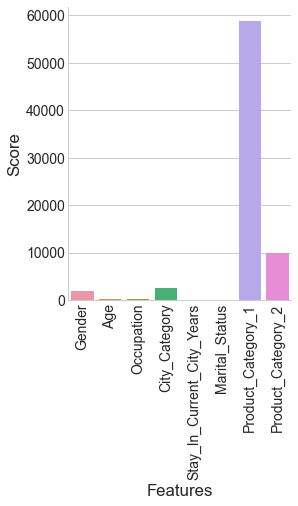

In [79]:
plt.figure(figsize=(10,10))
sns.catplot( x='Features', y='Score', kind='bar', data = featureScores)
plt.xticks(rotation=90);

In [80]:
# Considering the Top 6 Features based on their Scores
bf_final_6 = bf_final.drop(["Marital_Status","Stay_In_Current_City_Years"],axis=1)
bf_final_6.head(), bf_final_6.shape

(   Gender  Age  Occupation  City_Category  Product_Category_1  \
 0       0    0          10              0                   3   
 1       0    0          10              0                   1   
 2       0    0          10              0                  12   
 3       0    0          10              0                  12   
 4       1    6          16              2                   8   
 
    Product_Category_2  Purchase  
 0                 8.0      8370  
 1                 6.0     15200  
 2                 8.0      1422  
 3                14.0      1057  
 4                 8.0      7969  ,
 (537577, 7))

# Model Building

In [81]:
# Lets Build a Model using the top 6 best features
x = bf_final_6.drop("Purchase",axis=1)
y = bf_final_6["Purchase"]

np.random.seed(42)
# Lets Divide the Data in Train and Test Set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

<h4> 1. Linear Regression </h4>

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)


R2Linear = r2_score(y_test, y_pred)
MAELinear = mean_absolute_error(y_test,y_pred)
RMSELinear= np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R2 score for linear model: ', R2Linear)
print('Mean Absolute error: ', MAELinear)
print('RMSE:', RMSELinear)


R2 score for linear model:  0.10418827608850612
Mean Absolute error:  3620.4936920315617
RMSE: 4716.593925376563


<h4> 2. Ridge Regression</h4>

In [83]:
from sklearn.linear_model import Ridge

RR = Ridge(alpha=0.05, normalize=True)
RR.fit(x_train,y_train)
y_pred = RR.predict(x_test)

R2ridge = r2_score(y_test, y_pred)
MAEridge = mean_absolute_error(y_test,y_pred)
RMSEridge= np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('R2 score for RidgeRegression model: ', R2ridge)
print('Mean Absolute error: ', MAEridge)
print('RMSE:', RMSEridge)


R2 score for RidgeRegression model:  0.10415410986500862
Mean Absolute error:  3632.663611711192
RMSE: 4716.68386987125


<h4> 3. Lasso Regression</h4>

In [84]:
from sklearn.linear_model import Lasso

LR = Lasso(alpha=0.3, normalize=True)
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

R2Lasso = r2_score(y_test, y_pred)
MAELasso = mean_absolute_error(y_test,y_pred)
RMSELasso= np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('R2 score for LassoRegression model: ', R2Lasso)
print('Mean Absolute error: ', MAELasso)
print('RMSE:', RMSELasso)



R2 score for LassoRegression model:  0.09801688638550676
Mean Absolute error:  3673.80989546833
RMSE: 4732.812723392746


<h4> 4. ElasticNet Regression</h4>

In [85]:
from sklearn.linear_model import ElasticNet

# training the model with hyperparameters alpha=1, l1_ratio=0.5 and normalize=True
EN = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
EN.fit(x_train,y_train)
y_pred = EN.predict(x_test)

R2ElasticN = r2_score(y_test, y_pred)
MAEElasticN = mean_absolute_error(y_test,y_pred)
RMSEElasticN= np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('R2 score for RidgeRegression model: ', R2ElasticN)
print('Mean Absolute error: ', MAEElasticN)
print('RMSE:', RMSEElasticN)


R2 score for RidgeRegression model:  0.10226039098967965
Mean Absolute error:  3630.1019932372105
RMSE: 4721.66651141769


<h4> 5. Decision Tree Regressor</h4>

In [86]:
from sklearn.tree import DecisionTreeRegressor


DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)

R2DecisionT = r2_score(y_test, y_pred)
MAEDecisionT = mean_absolute_error(y_test,y_pred)
RMSEDecisionT= np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('R2 score for DecisionTree model: ', R2DecisionT)
print('Mean Absolute error: ', MAEDecisionT)
print('RMSE:', RMSEDecisionT)


R2 score for DecisionTree model:  0.6383323263992084
Mean Absolute error:  2261.792833889317
RMSE: 2996.918707017139


<h4> 6. Random Forest Regressor</h4>

In [87]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, min_samples_split=5 ,max_features='sqrt', random_state =0)
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)


R2RandomF = r2_score(y_test, y_pred)
MAERandomF = mean_absolute_error(y_test,y_pred)
RMSERandomF= np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('R2 score for RandomForestRegression model: ', R2RandomF)
print('Mean Absolute error: ', MAERandomF)
print('RMSE:', RMSERandomF)

R2 score for RandomForestRegression model:  0.6337213393758936
Mean Absolute error:  2258.9515707470814
RMSE: 3015.962415070655


<h4> 7. Extra Trees Regressor</h4>

In [88]:
from sklearn.ensemble import ExtraTreesRegressor

extraTR = ExtraTreesRegressor(n_estimators=10)
extraTR.fit(x_train,y_train)
y_pred= extraTR.predict(x_test)


R2extraTR = r2_score(y_test, y_pred)
MAEextraTR = mean_absolute_error(y_test,y_pred)
RMSEextraTR= np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('R2 score for ExtraTreesRegression model: ', R2extraTR)
print('Mean Absolute error: ', MAEextraTR)
print('RMSE:', RMSEextraTR)

R2 score for RandomForestRegression model:  0.6258911185982234
Mean Absolute error:  2271.5174210858418
RMSE: 3048.0292168184924


<h4> 8.Extreme Gradient Boosting (XGBoost)</h4>

In [89]:
import xgboost

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(x_train,y_train)
y_pred= xgb.predict(x_test)


R2xgb = r2_score(y_test, y_pred)
MAExgb = mean_absolute_error(y_test,y_pred)
RMSExgb= np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('R2 score for XGB model: ', R2xgb)
print('Mean Absolute error: ', MAExgb)
print('RMSE:', RMSExgb)


R2 score for XGB model:  0.6430409798170292
Mean Absolute error:  2252.193044803616
RMSE: 2977.345927595136


<h4> 9.DecisionTree with RandomisedSearchCV Model </h4>

In [90]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100,3)]
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 55, 100], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 8]}


In [91]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

### fit the randomized model
DT_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 15.6min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_features='sqrt',
                                                   min_samples_split=5,
                                                   random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 55, 100],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=100, verbose=2)

In [92]:
best_dt = DT_randomcv.best_estimator_

In [95]:
y_pred= best_dt.predict(x_test)


R2DecisionCV = r2_score(y_test, y_pred)
MAEDecisionCV = mean_absolute_error(y_test,y_pred)
RMSEDecisionCV= np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('R2 score for DecisionTree with RandomisedSearchCV model: ', R2DecisionCV)
print('Mean Absolute error: ', MAEDecisionCV)
print('RMSE:', RMSEDecisionCV)

R2 score for DecisionTree with RandomisedSearchCV model:  0.6380370908644244
Mean Absolute error:  2260.7425763499696
RMSE: 2998.141675596691


In [98]:
# modelRMSE = pd.DataFrame({"Linear Regression Model": [RMSELinear],
#                                "Ridge Regression Model": [RMSEridge],
#                                "Lasso Regression Model": [RMSELasso],
#                                "ElasticNet Regression Model": [RMSEElasticN],
#                                "Decision Tree Model":[RMSEDecisionT],
#                                 "RandomForest Regressor Model": [RMSERandomF],
#                                "ExtraTreesRegression Model" : [RMSEextraTR],
#                                 "XGB Model": [RMSExgb],
#                                 "DecisionTree with RandomisedSearchCV Model":[RMSEDecisionCV]})

In [107]:
modelRMSE

,Linear Regression,Ridge Regression Model,Lasso Regression Model,ElasticNet Regression Model,Decision Tree Model,RandomForest Regressor Model,ExtraTreesRegression Model,XGB Model,DecisionTree with RandomisedSearchCV Model
0,4716.593925,4716.68387,4732.812723,4721.666511,2996.918707,3015.962415,2998.141676,2977.345928,2998.141676


In [116]:
modelRMSE =  {'Models':['Linear Regression Model', 'Ridge Regression Model', 'Lasso Regression Model', 'ElasticNet Regression Model', 'Decision Tree Model', 'RandomForest Regressor Model','ExtraTreesRegression Model','XGB Model', 'DecisionTree with RandomisedSearchCV Model'], 'RMSEScores':[RMSELinear,RMSEridge,RMSELasso,RMSEElasticN,RMSEDecisionT,RMSERandomF,RMSEextraTR,RMSExgb,RMSEDecisionCV]}

In [138]:
# Create DataFrame 
df = pd.DataFrame(modelRMSE) 
df


,Models,RMSEScores
0,Linear Regression Model,4716.593925
1,Ridge Regression Model,4716.683870
2,Lasso Regression Model,4732.812723
3,ElasticNet Regression Model,4721.666511
4,Decision Tree Model,2996.918707
5,RandomForest Regressor Model,3015.962415
6,ExtraTreesRegression Model,2998.141676
7,XGB Model,2977.345928
8,DecisionTree with RandomisedSearchCV Model,2998.141676


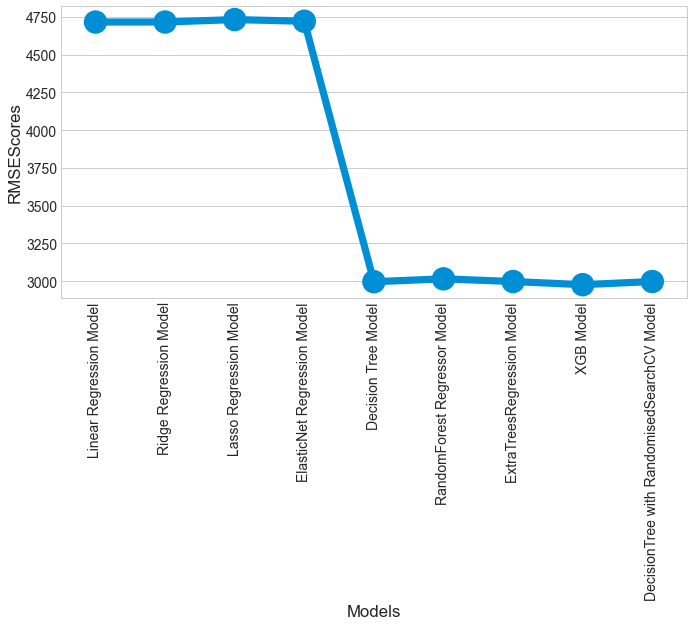

In [190]:
plt.figure(figsize=(10,5))
sns.pointplot(x='Models', y='RMSEScores', data=df)
plt.xticks(rotation=90);

In [191]:
#Saving a model

import pickle

pickle.dump(DT, open('DecisionTree.pkl','wb'))

pickle.dump(xgb,open('Xgboost.pkl', 'wb'))

